In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [23]:
start = '2012-01-01'
end = '2019-12-31'

df = data.DataReader('^BSESN', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,15970.309570,15640.559570,15640.559570,15939.360352,16200.0,15939.360352
2012-01-04,16004.690430,15822.320312,15967.490234,15882.639648,17800.0,15882.639648
2012-01-05,15980.169922,15809.309570,15893.070312,15857.080078,21200.0,15857.080078
2012-01-06,16001.309570,15664.910156,15789.080078,15867.730469,17200.0,15867.730469
2012-01-09,15871.509766,15678.299805,15840.219727,15814.719727,11200.0,15814.719727


In [24]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2012-01-03,15970.309570,15640.559570,15640.559570,15939.360352,16200.0,15939.360352
1,2012-01-04,16004.690430,15822.320312,15967.490234,15882.639648,17800.0,15882.639648
2,2012-01-05,15980.169922,15809.309570,15893.070312,15857.080078,21200.0,15857.080078
3,2012-01-06,16001.309570,15664.910156,15789.080078,15867.730469,17200.0,15867.730469
4,2012-01-09,15871.509766,15678.299805,15840.219727,15814.719727,11200.0,15814.719727


In [25]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,15970.309570,15640.559570,15640.559570,15939.360352,16200.0
1,16004.690430,15822.320312,15967.490234,15882.639648,17800.0
2,15980.169922,15809.309570,15893.070312,15857.080078,21200.0
3,16001.309570,15664.910156,15789.080078,15867.730469,17200.0
4,15871.509766,15678.299805,15840.219727,15814.719727,11200.0


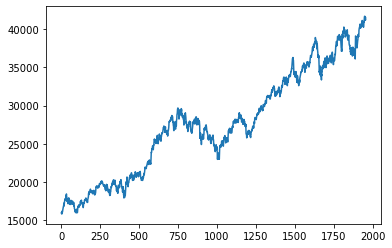

In [26]:
plt.plot(df.Close)

In [27]:
ma100 = df.Close.rolling(100).mean()
ma100

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
            ...     
1951    38870.630508
1952    38903.958320
1953    38940.881836
1954    38979.598125
1955    39018.163125
Name: Close, Length: 1956, dtype: float64

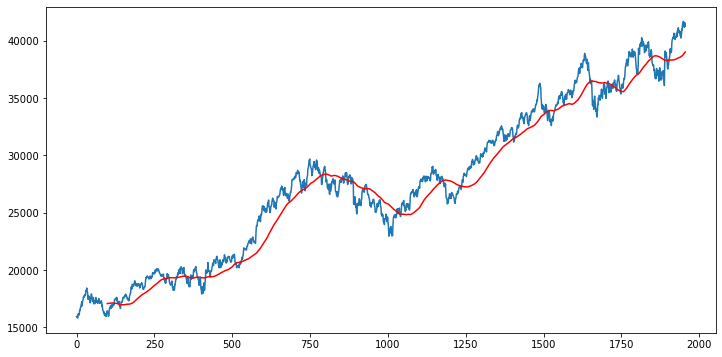

In [28]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [29]:
ma200 = df.Close.rolling(200).mean()
ma200

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
            ...     
1951    38731.616816
1952    38756.368730
1953    38784.375879
1954    38812.638730
1955    38839.570215
Name: Close, Length: 1956, dtype: float64

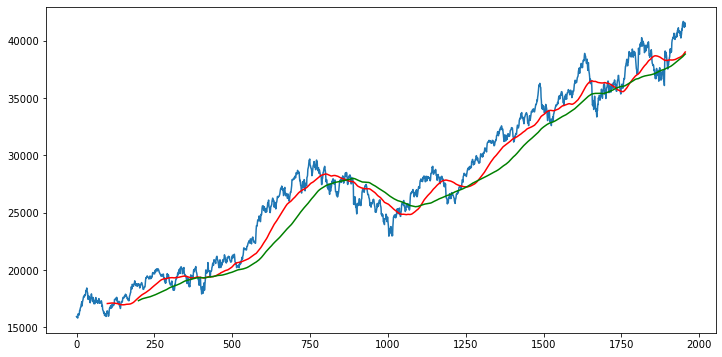

In [30]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [31]:
df.shape

(1956, 5)

In [32]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)


(1369, 1)
(587, 1)


In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [34]:
data_training_array = scaler.fit_transform(data_training)

In [35]:
data_training_array

array([[0.00743659],
       [0.00405239],
       [0.0025274 ],
       ...,
       [0.99412726],
       [0.97987589],
       [0.98509827]])

In [36]:
data_training_array.shape

(1369, 1)

In [37]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])


In [38]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [39]:
#ML Model

In [43]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [49]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
              input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2)) 


model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))





model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(.5))


model.add(Dense(units = 1))

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [51]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
40/40 [==============================] - 10s 171ms/step - loss: 0.0817
Epoch 2/50
40/40 [==============================] - 7s 165ms/step - loss: 0.0167
Epoch 3/50
40/40 [==============================] - 7s 170ms/step - loss: 0.0127
Epoch 4/50
40/40 [==============================] - 6s 162ms/step - loss: 0.0119
Epoch 5/50
40/40 [==============================] - 7s 165ms/step - loss: 0.0102
Epoch 6/50
40/40 [==============================] - 6s 160ms/step - loss: 0.0089
Epoch 7/50
40/40 [==============================] - 6s 155ms/step - loss: 0.0085
Epoch 8/50
40/40 [==============================] - 6s 151ms/step - loss: 0.0080
Epoch 9/50
40/40 [==============================] - 7s 164ms/step - loss: 0.0099
Epoch 10/50
40/40 [==============================] - 6s 159ms/step - loss: 0.0082
Epoch 11/50
40/40 [==============================] - 6s 154ms/step - loss: 0.0083
Epoch 12/50
40/40 [==============================] - 6s 157ms/step - loss: 0.0093
Epoch 13/50
40/40 [=====

In [52]:
model.save('keras_model.h5')

In [53]:
past_100_days = data_testing .tail(100)

In [54]:
final_df = past_100_days.append(data_testing, ignore_index=True)

In [55]:
final_df.head()

,Close
0,37481.121094
1,37018.320312
2,37118.218750
3,36699.839844
4,36976.851562


In [56]:
input_data = scaler.fit_transform(final_df)

In [57]:
input_data.shape

(687, 1)

In [59]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [61]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [62]:
#prediction

Y_predicted = model.predict(x_test)

In [64]:
scaler.scale_

array([9.50414182e-05])

In [67]:
scale_factor = 1/ 9.50414182e-05
Y_predicted = Y_predicted * scale_factor
y_test = y_test * scale_factor

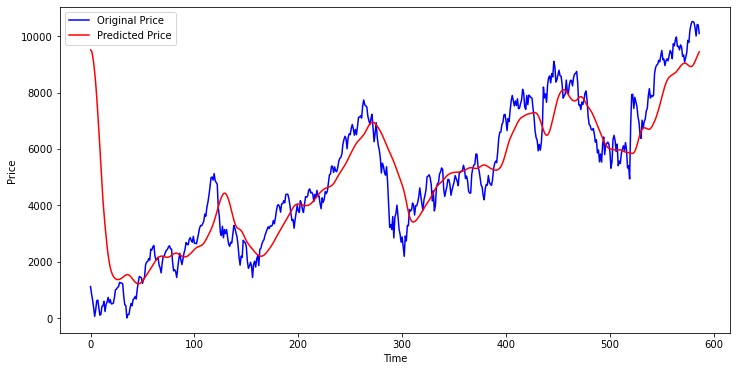

In [68]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(Y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()